### Loding the libraries to use functions

#### Pandas used for data frame implementations
#### Numpy used for numerical data manipulations
#### Seaborn and matplotlib are used for graphical representations

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading CSV into DataFrame

In [61]:
admission = pd.read_csv(r'C:\Users\admin\Desktop\Datasets\Admission_Predict_Ver1.1.csv')

### Basic EDA on data

In [62]:
print("Shape of original data:",admission.shape,end='\n\n')
print("Size of data:",admission.size, end='\n\n')
print("Data information:")
db_info = admission.info()
print("\n\nDescription: \n", admission.describe())
print("\n\nSnapshot of dataset: \n",admission.head())

Shape of original data: (500, 9)

Size of data: 4500

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Description: 
        Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%

### Cleaning the data

#### Data consists of serial no which is not needed in our case, so droping the column

In [148]:
admission = admission.drop(axis=1, labels='Serial No.')

KeyError: "['Serial No.'] not found in axis"

In [64]:
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Graphical representation

#### Correlation explains relationship of independent variables with each other from which we can conclude the effect of multi-collinearity

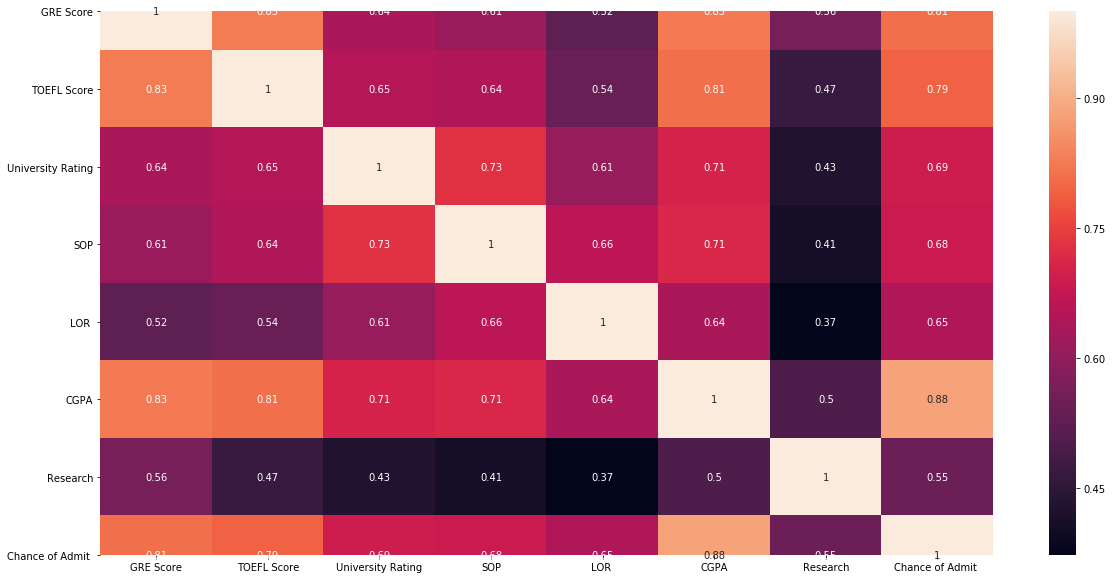

In [75]:
fig = plt.figure(figsize = (20,10))
corr = admission.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns, annot = True)
plt.show()

In [84]:
admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Model Building

#### 1. Selecting dependent and independent variables

In [110]:
# X-> Independent variable - Contributor
admission_x = admission.loc[:,['GRE Score']]

# Y-> Dependent variable - Predictor 
admission_y = admission.loc[:,['Chance of Admit ']]

#### 2. Splitting the dataset into train and test

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(admission_x, admission_y, test_size=0.2)

In [113]:
x_train.shape

(400, 1)

In [114]:
y_train.shape

(400, 1)

In [122]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
predicted = model.predict(x_test)

In [144]:
model.coef_

array([[0.81245012]])

In [145]:
from sklearn.metrics import mean_squared_error

In [146]:
mean_squared_error(y_test, predicted)

1.046474036429168

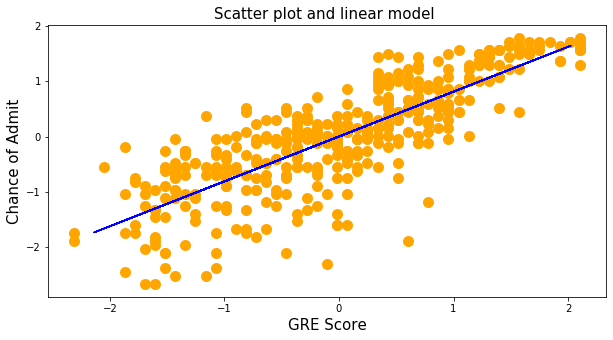

In [147]:
fig = plt.figure(figsize = (10,5))

plt.scatter(x_train, y_train, color = 'orange', linewidths = 5)
plt.plot(x_test, predicted, color = 'blue', )
plt.xlabel("GRE Score", size = 15)
plt.ylabel("Chance of Admit", size = 15)

plt.title("Scatter plot and linear model ", size = 15)
plt.show()